<a href="https://colab.research.google.com/github/AhmadYasserHamad/Assignment_4/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

In [ ]:
import pandas as pd
import opendatasets as od
df = pd.read_csv("data.csv")
# Quick look at the dataset
print(df.head())
print(df.info())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# drop un named column in data
df = df.drop('Unnamed: 32', axis=1)
print("\nDropped 'Unnamed: 32' column (empty column)")

# Remove non-feature columns (id and diagnosis for unsupervised learning) and id have no meaning
X = df.drop(['id', 'diagnosis'], axis=1, errors='ignore')

print(f"\nRemaining columns: {X.columns.tolist()}")
print(f"Features shape: {X.shape}")

# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for easier viewing
normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("\n" + "="*50)
print("NORMALIZATION COMPLETE")
print("="*50)
print(f"\nOriginal data statistics:")
print(X.describe())
print(f"\nNormalized data statistics:")
print(normalized_df.describe())

print(f"\nNormalized data shape: {X_normalized.shape}")

# Display first few rows of normalized data
print("\nFirst 5 rows of normalized data:")
print(normalized_df.head())


Dropped 'Unnamed: 32' column (empty column)

Remaining columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Features shape: (569, 30)

NORMALIZATION COMPLETE

Original data statistics:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   1

In [ ]:

import numpy as np

def kmeans_plusplus_init(X, k, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n_samples, n_features = X.shape
    centers = np.zeros((k, n_features))

    # Step 1: Choose first center randomly from data points
    first_center_idx = np.random.randint(0, n_samples)
    centers[0] = X[first_center_idx]
    print(f"Center 1 initialized at index {first_center_idx}")

    # Step 2: Choose remaining k-1 centers
    for i in range(1, k):
        # Calculate distance from each point to nearest existing center
        distances = np.zeros(n_samples)

        for j in range(n_samples):
            # Calculate distances to all existing centers
            dist_to_centers = np.zeros(i)
            for c in range(i):
                dist_to_centers[c] = np.sum((X[j] - centers[c]) ** 2)

            # Store minimum distance (squared distance to nearest center)
            distances[j] = np.min(dist_to_centers)

        # Choose next center with probability proportional to distance squared
        probabilities = distances / np.sum(distances)
        next_center_idx = np.random.choice(n_samples, p=probabilities)
        centers[i] = X[next_center_idx]
        print(f"Center {i+1} initialized at index {next_center_idx}")

    print(f"\nK-means++ initialization complete!")
    print(f"Initial centers shape: {centers.shape}")

    return centers
k = 2
initial_centers = kmeans_plusplus_init(X_normalized , k=k, random_state=42)

print(f"\nInitial Centers:")
print(initial_centers)


Center 1 initialized at index 102
Center 2 initialized at index 432

K-means++ initialization complete!
Initial centers shape: (2, 30)

Initial Centers:
[[-0.5530585   0.28631105 -0.60751564 -0.55798194 -1.15503513 -1.21215527
  -0.81568788 -0.8052661  -0.2651265  -0.85447642 -0.76793904  0.64254367
  -0.83316584 -0.5644996  -0.65368614 -1.08314703 -0.70305211 -0.81090835
  -0.73522485 -0.85594642 -0.60658404  1.16641373 -0.67557894 -0.58500369
  -0.87972471 -1.05373391 -0.75651421 -0.61357437 -0.33448538 -0.84042616]
 [ 1.71905507  0.05825847  1.72302589  1.69255646  1.20552258  0.84445927
   1.56310249  1.98564279 -0.31989066 -0.32145729  0.10079781 -0.39163235
   0.07026503  0.26738504  0.68203468  0.09343955  0.78138781  1.18475716
   0.48040333  0.07946914  1.19296315 -0.09888253  1.15386726  1.05196463
   1.4961806   0.25404212  1.24069484  1.56367679  0.21232446 -0.17709882]]


In [ ]:
def kmeans(X, k, centers, epochs, tolerance=1e-6, verbose=True):
    """K-means clustering algorithm"""
    n_samples, n_features = X.shape
    labels = np.zeros(n_samples, dtype=int)
    inertia_history = []

    if verbose:
        print(f"Starting K-means algorithm...")
        print(f"Data shape: {X.shape}")
        print(f"Number of clusters (k): {k}")
        print(f"Max epochs: {epochs}")
        print(f"Convergence tolerance: {tolerance}\n")

    for epoch in range(epochs):
        # Assignment step
        for i in range(n_samples):
            distances = np.zeros(k)
            for j in range(k):
                distances[j] = np.sum((X[i] - centers[j]) ** 2)
            labels[i] = np.argmin(distances)

        # Update step
        new_centers = np.zeros((k, n_features))
        for j in range(k):
            cluster_points = X[labels == j]
            if len(cluster_points) > 0:
                new_centers[j] = np.mean(cluster_points, axis=0)
            else:
                new_centers[j] = centers[j]

        # Calculate inertia
        inertia = 0
        for i in range(n_samples):
            inertia += np.sum((X[i] - centers[labels[i]]) ** 2)
        inertia_history.append(inertia)

        # Check convergence
        center_shift = np.sum(np.abs(new_centers - centers))

        if verbose:
            print(f"Epoch {epoch + 1}/{epochs} - Inertia: {inertia:.4f} - Center shift: {center_shift:.6f}")

        if center_shift < tolerance:
            if verbose:
                print(f"\nConverged at epoch {epoch + 1}! (Center shift {center_shift:.6f} < tolerance {tolerance})")
            centers = new_centers
            break

        centers = new_centers

    if verbose:
        print(f"\nK-means complete!")
        print(f"Final inertia: {inertia_history[-1]:.4f}")

        # Print cluster sizes
        print(f"\nCluster sizes:")
        for i in range(k):
            cluster_size = np.sum(labels == i)
            print(f"Cluster {i}: {cluster_size} points")

    return centers, labels, inertia_history



# Example usage
# Assuming normalized_df is available from previous code
X_data = normalized_df.values

# Parameters
k = 2
epochs = 100

# Initialize centers using K-means++
print("="*50)
print("K-MEANS++ INITIALIZATION")
print("="*50)
initial_centers = kmeans_plusplus_init(X_data, k=k, random_state=42)

# Run K-means
print("\n" + "="*50)
print("K-MEANS CLUSTERING")
print("="*50)
final_centers, labels, inertia_history = kmeans(X_data, k, initial_centers, epochs)

print("\n" + "="*50)
print("RESULTS")
print("="*50)
print(f"Final centers shape: {final_centers.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Unique labels: {np.unique(labels)}")

K-MEANS++ INITIALIZATION
Center 1 initialized at index 102
Center 2 initialized at index 432

K-means++ initialization complete!
Initial centers shape: (2, 30)

K-MEANS CLUSTERING
Starting K-means algorithm...
Data shape: (569, 30)
Number of clusters (k): 2
Max epochs: 100
Convergence tolerance: 1e-06

Epoch 1/100 - Inertia: 16420.4473 - Center shift: 27.497835
Epoch 2/100 - Inertia: 11599.9686 - Center shift: 0.834528
Epoch 3/100 - Inertia: 11595.6965 - Center shift: 0.172283
Epoch 4/100 - Inertia: 11595.5266 - Center shift: 0.000000

Converged at epoch 4! (Center shift 0.000000 < tolerance 1e-06)

K-means complete!
Final inertia: 11595.5266

Cluster sizes:
Cluster 0: 375 points
Cluster 1: 194 points

RESULTS
Final centers shape: (2, 30)
Labels shape: (569,)
Unique labels: [0 1]


ELBOW METHOD - Finding Optimal K

Testing K = 1
Center 1 initialized at index 102

K-means++ initialization complete!
Initial centers shape: (1, 30)
K = 1: WCSS (Inertia) = 17070.0000, Distortion = 30.0000, Converged in 2 epochs

Testing K = 2
Center 1 initialized at index 102
Center 2 initialized at index 432

K-means++ initialization complete!
Initial centers shape: (2, 30)
K = 2: WCSS (Inertia) = 11595.5266, Distortion = 20.3788, Converged in 4 epochs

Testing K = 3
Center 1 initialized at index 102
Center 2 initialized at index 432
Center 3 initialized at index 81

K-means++ initialization complete!
Initial centers shape: (3, 30)
K = 3: WCSS (Inertia) = 10061.7978, Distortion = 17.6833, Converged in 10 epochs

Testing K = 4
Center 1 initialized at index 102
Center 2 initialized at index 432
Center 3 initialized at index 81
Center 4 initialized at index 426

K-means++ initialization complete!
Initial centers shape: (4, 30)
K = 4: WCSS (Inertia) = 9339.3911, Distortion = 16.4137, Con

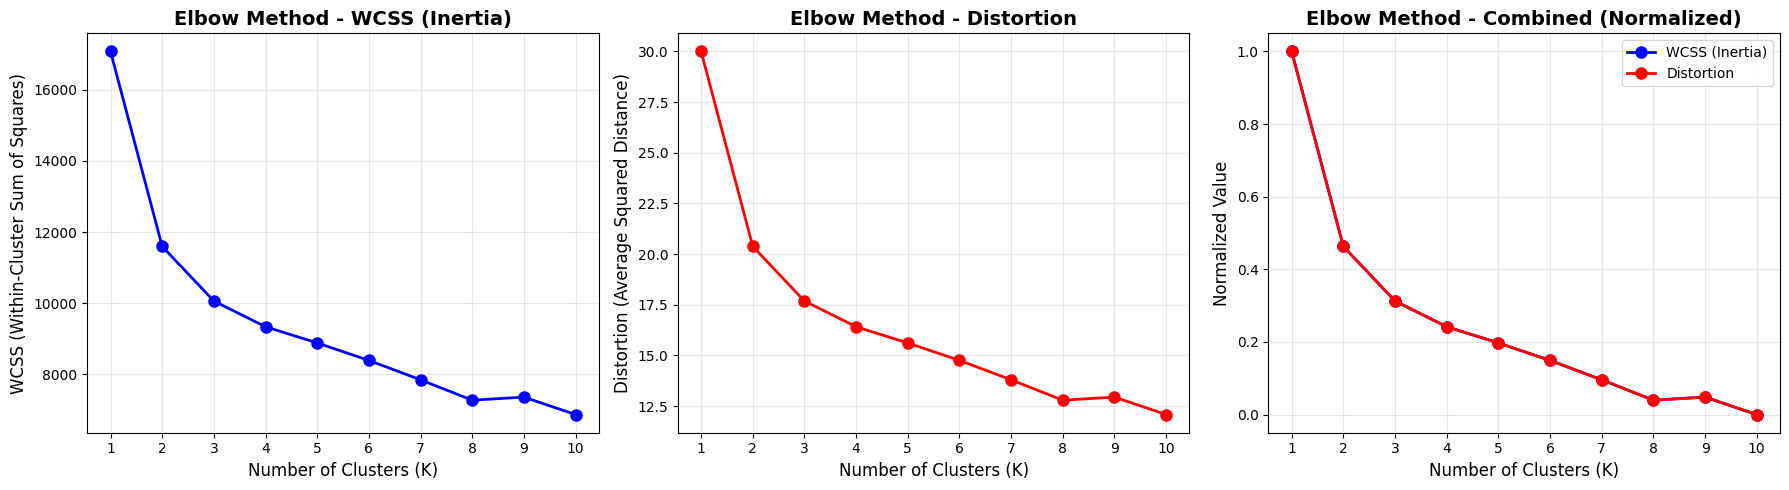


Elbow Method Complete!

Interpretation:
- Look for the 'elbow' point where the curve bends
- This is where adding more clusters gives diminishing returns
- The optimal K is typically at the elbow

WCSS/Inertia values:
K=1: 17070.0000
K=2: 11595.5266
K=3: 10061.7978
K=4: 9339.3911
K=5: 8885.0056
K=6: 8394.4252
K=7: 7849.3084
K=8: 7276.9485
K=9: 7364.3734
K=10: 6873.5905

Distortion values:
K=1: 30.0000
K=2: 20.3788
K=3: 17.6833
K=4: 16.4137
K=5: 15.6151
K=6: 14.7529
K=7: 13.7949
K=8: 12.7890
K=9: 12.9427
K=10: 12.0801


In [ ]:
import matplotlib.pyplot as plt
def calculate_distortion(X, centers, labels):
    """
    Calculate distortion (average squared distance to cluster center)
    Distortion = WCSS / n_samples
    """
    n_samples = len(X)
    distortion = 0

    for i in range(n_samples):
        distortion += np.sum((X[i] - centers[labels[i]]) ** 2)

    return distortion / n_samples


def elbow_method(X, k_range, epochs=100, random_state=42):
    """
    Apply elbow method to find optimal K

    Parameters:
    -----------
    X : numpy array
        The data points
    k_range : range or list
        Range of K values to try
    epochs : int
        Maximum iterations for each K-means run
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    wcss_list : list
        Within-Cluster Sum of Squares (Inertia) for each K
    distortion_list : list
        Distortion for each K
    inertia_histories : list
        List of inertia histories for each K
    """
    wcss_list = []
    distortion_list = []
    inertia_histories = []

    print("="*60)
    print("ELBOW METHOD - Finding Optimal K")
    print("="*60)

    for k in k_range:
        print(f"\n{'='*60}")
        print(f"Testing K = {k}")
        print('='*60)

        # Initialize centers
        initial_centers = kmeans_plusplus_init(X, k, random_state=random_state)

        # Run K-means (verbose=False to reduce output)
        final_centers, labels, inertia_history = kmeans(X, k, initial_centers, epochs, verbose=False)

        # Get final WCSS (inertia)
        final_wcss = inertia_history[-1]

        # Calculate distortion
        distortion = calculate_distortion(X, final_centers, labels)

        wcss_list.append(final_wcss)
        distortion_list.append(distortion)
        inertia_histories.append(inertia_history)

        print(f"K = {k}: WCSS (Inertia) = {final_wcss:.4f}, Distortion = {distortion:.4f}, Converged in {len(inertia_history)} epochs")

    return wcss_list, distortion_list, inertia_histories


# Run elbow method
X_data = normalized_df.values
k_range = range(1, 11)  # Test K from 1 to 10

wcss_list, distortion_list, inertia_histories = elbow_method(X_data, k_range, epochs=100, random_state=42)

# Plot results
print("\n" + "="*60)
print("PLOTTING RESULTS")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: WCSS (Inertia)
axes[0].plot(k_range, wcss_list, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method - WCSS (Inertia)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Plot 2: Distortion
axes[1].plot(k_range, distortion_list, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Distortion (Average Squared Distance)', fontsize=12)
axes[1].set_title('Elbow Method - Distortion', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

# Plot 3: Both on same plot (normalized)
# Normalize both metrics to 0-1 range for comparison
wcss_normalized = (wcss_list - np.min(wcss_list)) / (np.max(wcss_list) - np.min(wcss_list))
distortion_normalized = (distortion_list - np.min(distortion_list)) / (np.max(distortion_list) - np.min(distortion_list))

axes[2].plot(k_range, wcss_normalized, 'bo-', linewidth=2, markersize=8, label='WCSS (Inertia)')
axes[2].plot(k_range, distortion_normalized, 'ro-', linewidth=2, markersize=8, label='Distortion')
axes[2].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[2].set_ylabel('Normalized Value', fontsize=12)
axes[2].set_title('Elbow Method - Combined (Normalized)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(k_range)
axes[2].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("\nElbow Method Complete!")
print("\nInterpretation:")
print("- Look for the 'elbow' point where the curve bends")
print("- This is where adding more clusters gives diminishing returns")
print("- The optimal K is typically at the elbow")
print("\nWCSS/Inertia values:")
for k, wcss in zip(k_range, wcss_list):
    print(f"K={k}: {wcss:.4f}")
print("\nDistortion values:")
for k, dist in zip(k_range, distortion_list):
    print(f"K={k}: {dist:.4f}")

elbow method = called elbow because for sure when i increase k the wcc will convirge or error will beocme lower
WCSS : WCSS measures how compact the clusters are. It is the sum of squared distances between each point and the centroid of the cluster it belongs to.
Inertia : same as WCSS
Distortion : is a normalized version of WCSS just to make it easier to compare between different data sets so distortion = 1/n WCSS and remeber they have graph of distortion and WCSS becuse scaling does not change shape of graph


Center 1 initialized at index 102
Center 2 initialized at index 432

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 102
Center 2 initialized at index 432
Center 3 initialized at index 81

K-means++ initialization complete!
Initial centers shape: (3, 30)
Center 1 initialized at index 102
Center 2 initialized at index 432
Center 3 initialized at index 81
Center 4 initialized at index 426

K-means++ initialization complete!
Initial centers shape: (4, 30)
Center 1 initialized at index 102
Center 2 initialized at index 432
Center 3 initialized at index 81
Center 4 initialized at index 426
Center 5 initialized at index 294

K-means++ initialization complete!
Initial centers shape: (5, 30)
Center 1 initialized at index 102
Center 2 initialized at index 432
Center 3 initialized at index 81
Center 4 initialized at index 426
Center 5 initialized at index 294
Center 6 initialized at index 212

K-means++ initialization complete!
Initial centers shap

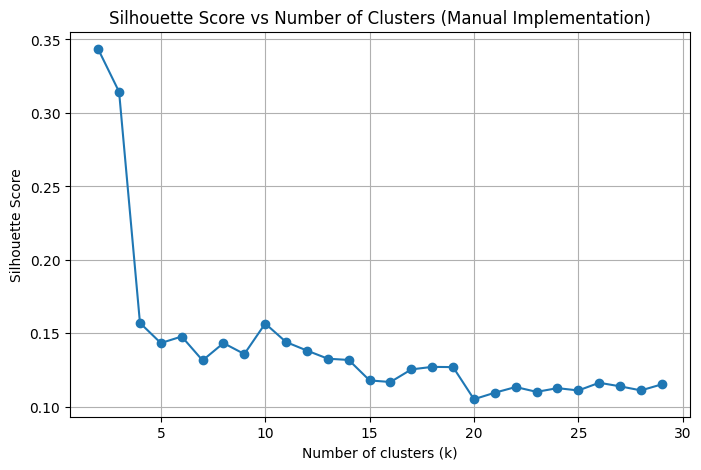

In [ ]:
def compute_distance_matrix(X):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            diff = X[i] - X[j]
            dist = np.sqrt(np.sum(diff ** 2))
            distances[i, j] = dist
            distances[j, i] = dist

    return distances

def silhouette_score_readable(X, labels):
    n_samples = X.shape[0]
    unique_clusters = np.unique(labels)

    if len(unique_clusters) < 2:
        raise ValueError("Silhouette score is undefined for k < 2")

    # Precompute all distances
    distances = compute_distance_matrix(X)

    silhouette_values = []

    for i in range(n_samples):
        current_cluster = labels[i]

        # ---- a(i): mean distance to points in the same cluster ----
        intra_cluster_distances = []

        for j in range(n_samples):
            if labels[j] == current_cluster and j != i:
                intra_cluster_distances.append(distances[i, j])

        if len(intra_cluster_distances) == 0:
            a_i = 0.0
        else:
            a_i = sum(intra_cluster_distances) / len(intra_cluster_distances)

        # ---- b(i): minimum mean distance to other clusters ----
        b_i = float("inf")

        for cluster in unique_clusters:
            if cluster == current_cluster:
                continue

            inter_cluster_distances = []

            for j in range(n_samples):
                if labels[j] == cluster:
                    inter_cluster_distances.append(distances[i, j])

            if len(inter_cluster_distances) > 0:
                mean_distance = sum(inter_cluster_distances) / len(inter_cluster_distances)
                b_i = min(b_i, mean_distance)

        # ---- silhouette for point i ----
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_values.append(s_i)

    # ---- overall silhouette score ----
    return sum(silhouette_values) / len(silhouette_values)

import matplotlib.pyplot as plt

K_values = range(2, 30)
silhouette_scores = []

for k in K_values:
    # Initialize centroids (K-Means++)
    init_centers = kmeans_plusplus_init(X_data, k=k, random_state=42)

    # Run K-Means
    centers, labels, _ = kmeans(
        X_data,
        k,
        init_centers,
        epochs=100,
        verbose=False
    )

    # Compute silhouette score (manual, readable version)
    score = silhouette_score_readable(X_data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(list(K_values), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (Manual Implementation)")
plt.grid(True)
plt.show()


Informally, uniformly distributed data means that points occupy the space evenly, with no region having higher density or structure than another. There are no natural clusters, and any grouping observed is due to randomness rather than underlying structure like running your k-means on data does not respect you assumptions , but if you run k-means on data that respect you are assumption and have meangiful structure it should be different

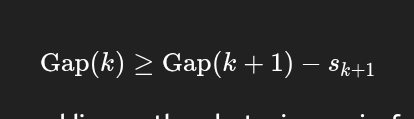

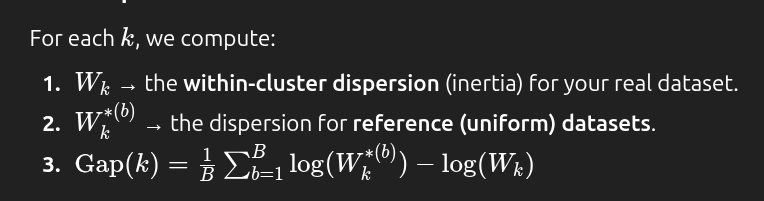**

Computing Gap Statistic for k = 1
Center 1 initialized at index 504

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 65

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 337

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 222

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 560

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 398

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 533

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 293

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 107

K-means++ initialization complete!
Initial centers shape: (1, 30)
Center 1 initialized at index 139

K-means++ initializatio

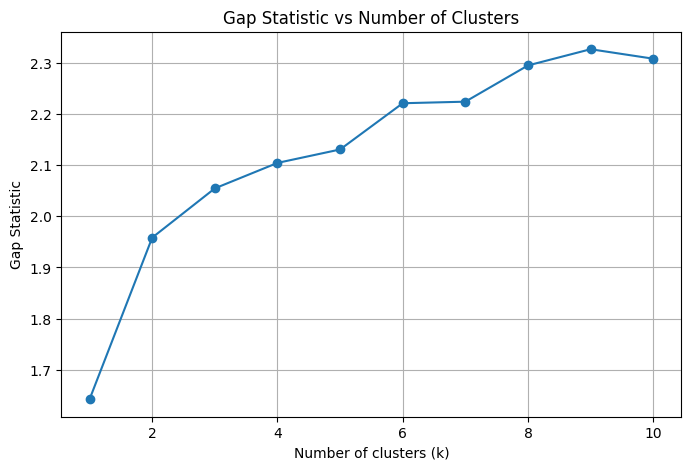

Optimal k according to Gap Statistic: 6


In [27]:
def compute_feature_bounds(X):
    feature_mins = np.min(X, axis=0)
    feature_maxs = np.max(X, axis=0)
    return feature_mins, feature_maxs

def generate_uniform_reference(X, n_samples):
    feature_mins, feature_maxs = compute_feature_bounds(X)
    n_features = X.shape[1]

    reference_data = np.zeros((n_samples, n_features))

    for j in range(n_features):
        reference_data[:, j] = np.random.uniform(
            feature_mins[j],
            feature_maxs[j],
            size=n_samples
        )

    return reference_data
def compute_inertia(X, k, epochs=100):
    init_centers = kmeans_plusplus_init(X, k=k)
    _, _, inertia_history = kmeans(
        X, k, init_centers, epochs=epochs, verbose=False
    )
    return inertia_history[-1]

def gap_statistic(X, k_max, B=10, epochs=100):
    n_samples = X.shape[0]

    gap_values = []
    sk_values = []

    for k in range(1, k_max + 1):
        print(f"Computing Gap Statistic for k = {k}")

        # ---- Real data inertia ----
        Wk = compute_inertia(X, k, epochs)
        log_Wk = np.log(Wk)

        # ---- Reference data inertias ----
        log_Wk_refs = []

        for b in range(B):
            X_ref = generate_uniform_reference(X, n_samples)
            Wk_ref = compute_inertia(X_ref, k, epochs)
            log_Wk_refs.append(np.log(Wk_ref))

        # ---- Gap value ----
        gap_k = np.mean(log_Wk_refs) - log_Wk
        gap_values.append(gap_k)

        # ---- Standard deviation ----
        std_k = np.std(log_Wk_refs)
        sk = np.sqrt(1 + 1 / B) * std_k
        sk_values.append(sk)

    return gap_values, sk_values
k_max = 10
B = 10  # number of reference datasets

gap_values, sk_values = gap_statistic(
    X_data,
    k_max=k_max,
    B=B,
    epochs=100
)
import matplotlib.pyplot as plt

k_values = list(range(1, k_max + 1))

plt.figure(figsize=(8, 5))
plt.plot(k_values, gap_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Gap Statistic")
plt.title("Gap Statistic vs Number of Clusters")
plt.grid(True)
plt.show()
def select_optimal_k(gap_values, sk_values):
    for k in range(len(gap_values) - 1):
        if gap_values[k] >= gap_values[k + 1] - sk_values[k + 1]:
            return k + 1  # +1 because k starts at 1
    return len(gap_values)
optimal_k = select_optimal_k(gap_values, sk_values)
print(f"Optimal k according to Gap Statistic: {optimal_k}")


Center 1 initialized at index 333
Center 2 initialized at index 270

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 432
Center 2 initialized at index 527

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 314
Center 2 initialized at index 242

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 560
Center 2 initialized at index 217

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 521
Center 2 initialized at index 543

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 408
Center 2 initialized at index 186

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 45
Center 2 initialized at index 102

K-means++ initialization complete!
Initial centers shape: (2, 30)
Center 1 initialized at index 258
Center 2 initialized a

/tmp/ipython-input-2157953714.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([random_inertia, kpp_inertia], labels=["Random", "K-Means++"])


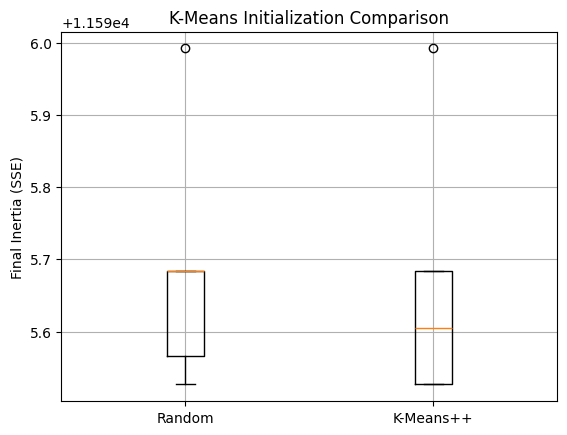

In [31]:
import numpy as np

def random_init(X, k, random_state=None):

    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, k, replace=False)
    centers = X[indices]
    return centers

k = 2  # We know Breast Cancer dataset is binary
epochs = 100
runs = 10  # repeat to account for randomness
def run_kmeans_comparison(X, k, epochs, runs):
    random_inertia = []
    kpp_inertia = []

    for run in range(runs):
        # ---- Random Initialization ----
        random_centers = random_init(X, k)
        _, _, inertia_history = kmeans(X, k, random_centers, epochs, verbose=False)
        random_inertia.append(inertia_history[-1])

        # ---- K-Means++ Initialization ----
        kpp_centers = kmeans_plusplus_init(X, k)
        _, _, inertia_history = kmeans(X, k, kpp_centers, epochs, verbose=False)
        kpp_inertia.append(inertia_history[-1])

    return random_inertia, kpp_inertia

random_inertia, kpp_inertia = run_kmeans_comparison(X_data, k=k, epochs=100, runs=10)

print(f"Random init: mean inertia = {np.mean(random_inertia):.2f}, std = {np.std(random_inertia):.2f}")
print(f"K-Means++: mean inertia = {np.mean(kpp_inertia):.2f}, std = {np.std(kpp_inertia):.2f}")
import matplotlib.pyplot as plt

plt.boxplot([random_inertia, kpp_inertia], labels=["Random", "K-Means++"])
plt.ylabel("Final Inertia (SSE)")
plt.title("K-Means Initialization Comparison")
plt.grid(True)
plt.show()


| Metric                | Random Init | K-Means++ |
| --------------------- | ----------- | --------- |
| Mean Inertia          | Higher      | Lower     |
| Std of Inertia        | Higher      | Lower     |
| Convergence Speed     | Slower      | Faster    |
| Stability Across Runs | Poor        | Better    |
